In [6]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('ggplot')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=5, suppress=True,formatter={'float': lambda x: f'{x:6.3f}'})
import yfinance as yf

In [7]:
df = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]
df

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.54%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.64%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.80%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,2.93%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.04%
5,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
6,Caterpillar,NYSE,CAT,Construction and mining,1991-05-06,NaN,5.45%
7,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.59%
8,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.81%
9,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.02%


In [8]:
tickers = df.Symbol.to_list() + ["TSLA", "ORCL", "NFLX", "AAPL"]
tickers = list(set(tickers))
tickers

['CVX',
 'HON',
 'JPM',
 'MCD',
 'NFLX',
 'TRV',
 'VZ',
 'AMGN',
 'MRK',
 'NKE',
 'V',
 'DOW',
 'INTC',
 'BA',
 'HD',
 'WMT',
 'PG',
 'DIS',
 'CSCO',
 'AXP',
 'KO',
 'JNJ',
 'UNH',
 'AMZN',
 'CRM',
 'AAPL',
 'MMM',
 'CAT',
 'IBM',
 'ORCL',
 'TSLA',
 'MSFT',
 'GS']

In [52]:
start_date = '2023-01-27'
end_date = '2024-01-27'

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data.to_csv(f'./data/daily/{ticker}.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## Technical Analysis

In [53]:
import pandas_ta as pta

In [54]:
def strategy_long(df):
    df["std_90"] = 1 + (((df["Close"] - df["Close"].shift(1)) / df["Close"].shift(1)).rolling(window=45).std())
    df["moving_average"] = df["Close"].rolling(window=17).mean()
    df["Open_prev"] = df["Open"].shift(1)
    df["std_90_prev"] = df["std_90"].shift(1)
    df["moving_average_prev"] = df["moving_average"].shift(1)
    df["Low_prev"] = df["Low"].shift(1)
    trades = df[(df["Open"] > df["moving_average_prev"]) & (df["Open"] < (df["Low_prev"] * df["std_90_prev"]))]
    trades["returns"] = (trades["Close"] - trades["Open"]) / trades["Open"]
    captial = 10000

    simulated_trades = []
    for index, row in trades.iterrows():
        captial = captial * (1 + row["returns"])
        simulated_trades.append([index,captial,row["returns"]])

    total_returns = (captial - 10000) / 10000
    drawdown = trades["returns"].min()
    sharpe = trades["returns"].mean() / trades["returns"].std() * np.sqrt(252)
    
    simulated_trades = pd.DataFrame(simulated_trades, columns=["Date", "Capital", "Returns"])
    simulated_trades.set_index("Date", inplace=True)

    return {
        "total_returns": total_returns,
        "drawdown": drawdown,
        "sharpe": sharpe,
        "simulated_trades": simulated_trades
    }

def strategy_long_short(df):
    df["std_90"] = 1 + (((df["Close"] - df["Close"].shift(1)) / df["Close"].shift(1)).rolling(window=90).std())
    df["moving_average"] = df["Close"].rolling(window=20).mean()
    df["Open_prev"] = df["Open"].shift(1)
    df["std_90_prev"] = df["std_90"].shift(1)
    df["moving_average_prev"] = df["moving_average"].shift(1)
    df["Low_prev"] = df["Low"].shift(1)
    df["High_prev"] = df["High"].shift(1)

    df["signal"] = np.where((df["Open"] > df["moving_average_prev"]) & (df["Open"] < (df["Low_prev"] * df["std_90_prev"])), 1, 0)
    df["signal"] = np.where((df["Open"] < df["moving_average_prev"]) & (df["Open"] > (df["High_prev"] * df["std_90_prev"])), -1, df["signal"])
    
    trades = df[df["signal"] != 0]
    trades["returns"] = ((trades["Close"] - trades["Open"]) / trades["Open"]) * trades["signal"]
    captial = 10000

    simulated_trades = []
    for index, row in trades.iterrows():
        captial = captial * (1 + row["returns"])
        simulated_trades.append([index,captial,row["returns"]])

    total_returns = (captial - 10000) / 10000
    drawdown = trades["returns"].min()
    sharpe = trades["returns"].mean() / trades["returns"].std() * np.sqrt(252)
    
    simulated_trades = pd.DataFrame(simulated_trades, columns=["Date", "Capital", "Returns"])
    simulated_trades.set_index("Date", inplace=True)

    return {
        "total_returns": total_returns,
        "drawdown": drawdown,
        "sharpe": sharpe,
        "simulated_trades": simulated_trades
    }

def visualize(trades, ticker):

    plt.figure(figsize=(10, 6))
    plt.plot(trades["Capital"])
    plt.title(f"Simulated Trades of {ticker}")
    plt.show()

In [55]:
main_df = pd.DataFrame()
sim_trades = dict()

for ticker in tickers:
    df = pd.read_csv(f'./data/daily/{ticker}.csv', index_col=0, parse_dates=True)
    trades = strategy_long(df)
    main_df[ticker] = [trades["total_returns"], trades["drawdown"], trades["sharpe"]]
    sim_trades[ticker] = trades["simulated_trades"]

main_df = main_df.T
main_df.columns = ["total_returns", "drawdown", "sharpe"]
    # visualize(trades, ticker)

C:\Users\ishaa\AppData\Local\Temp\ipykernel_6904\3210489495.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades["returns"] = (trades["Close"] - trades["Open"]) / trades["Open"]
C:\Users\ishaa\AppData\Local\Temp\ipykernel_6904\3210489495.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades["returns"] = (trades["Close"] - trades["Open"]) / trades["Open"]
C:\Users\ishaa\AppData\Local\Temp\ipykernel_6904\3210489495.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [56]:
main_df.sort_values(by="total_returns", ascending=False)

,total_returns,drawdown,sharpe
MSFT,0.217940,-0.037147,2.778069
TSLA,0.209561,-0.059594,1.839127
AXP,0.186842,-0.025357,4.474939
CSCO,0.181713,-0.015904,4.227970
JPM,0.166019,-0.019183,3.731596
INTC,0.165538,-0.057846,1.610288
GS,0.151101,-0.016637,3.176101
ORCL,0.132463,-0.025032,2.189994
NKE,0.128994,-0.025678,2.377701
IBM,0.095376,-0.016904,2.515929


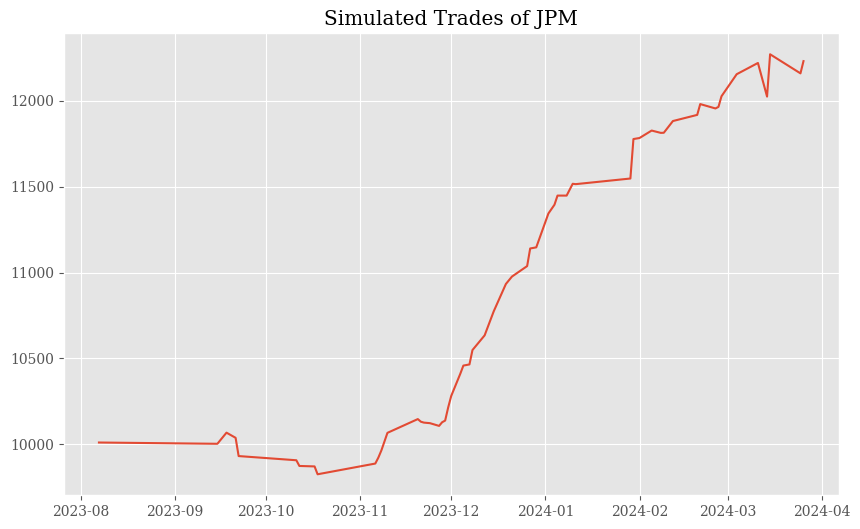

In [42]:
visualize(sim_trades["JPM"], "JPM")

In [20]:
sim_trades["TSLA"]

,Capital,Returns
Date,,
2018-05-14,9625.807952,-0.037419
2018-06-05,9413.374228,-0.022069
2018-06-08,9373.832487,-0.004201
2018-06-11,9652.567524,0.029735
2018-06-13,9598.834941,-0.005567
...,...,...
2024-02-28,46905.577717,0.008083
2024-02-29,46377.209316,-0.011265
2024-03-01,46867.531754,0.010572
